In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
#import citipy
from citipy import citipy

In [37]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

578

In [38]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vanimo
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | erechim
Processing Record 5 of Set 1 | khowst
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | saginaw
Processing Record 8 of Set 1 | vila franca do campo
Processing Record 9 of Set 1 | comodoro rivadavia
Processing Record 10 of Set 1 | denpasar
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | uk
City not found. Skipping...
Processing Record 15 of Set 1 | lerwick
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | guane
Processing Record 2

Processing Record 39 of Set 4 | erzin
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | lashio
Processing Record 42 of Set 4 | fortuna
Processing Record 43 of Set 4 | houma
Processing Record 44 of Set 4 | road town
Processing Record 45 of Set 4 | yaan
Processing Record 46 of Set 4 | tazlar
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | buala
Processing Record 49 of Set 4 | puerto quijarro
Processing Record 50 of Set 4 | oyama
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | mandalgovi
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | yakshur-bodya
City not found. Skipping...
Processing Record 6 of Set 5 | marcona
City not found. Skipping...
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | yecla
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | evensk
Processing Record 11 of Set 5 | ost

Processing Record 27 of Set 8 | eyl
Processing Record 28 of Set 8 | flinders
Processing Record 29 of Set 8 | takoradi
Processing Record 30 of Set 8 | kisangani
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | konevo
Processing Record 33 of Set 8 | sadao
Processing Record 34 of Set 8 | sinnamary
Processing Record 35 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 36 of Set 8 | abha
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | eureka
Processing Record 39 of Set 8 | vallenar
Processing Record 40 of Set 8 | aksarka
Processing Record 41 of Set 8 | kashi
Processing Record 42 of Set 8 | nagua
Processing Record 43 of Set 8 | tel aviv-yafo
Processing Record 44 of Set 8 | kailua
Processing Record 45 of Set 8 | itacurubi del rosario
Processing Record 46 of Set 8 | porto walter
Processing Record 47 of Set 8 | port keats
Processing Record 48 of Set 8 | champerico
Processing Record 49 of Set 8 | estelle
Processing Record 50 of

Processing Record 17 of Set 12 | carbondale
Processing Record 18 of Set 12 | nur
Processing Record 19 of Set 12 | sataua
City not found. Skipping...
Processing Record 20 of Set 12 | elliot lake
Processing Record 21 of Set 12 | bennington
Processing Record 22 of Set 12 | verkhoyansk
Processing Record 23 of Set 12 | buraydah
Processing Record 24 of Set 12 | muroto
Processing Record 25 of Set 12 | portel
Processing Record 26 of Set 12 | qaqortoq
Processing Record 27 of Set 12 | igrim
Processing Record 28 of Set 12 | ahraura
-----------------------------
Data Retrieval Complete      
-----------------------------


In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanimo,-2.6741,141.3028,84.58,70,100,2.95,PG,2021-01-11 01:11:55
1,Sao Filipe,14.8961,-24.4956,70.86,71,100,17.76,CV,2021-01-11 01:06:54
2,Tiksi,71.6872,128.8694,-20.56,85,100,17.34,RU,2021-01-11 01:11:44
3,Erechim,-27.6342,-52.2739,78.80,78,20,4.61,BR,2021-01-11 01:20:17
4,Khowst,33.3833,69.8833,39.13,35,0,4.97,AF,2021-01-11 01:20:17
5,Saginaw,43.3334,-84.0333,28.99,86,90,3.44,US,2021-01-11 01:15:43
6,Vila Franca Do Campo,37.7167,-25.4333,55.40,94,75,10.36,PT,2021-01-11 01:11:40
7,Comodoro Rivadavia,-45.8667,-67.5000,62.60,25,20,23.02,AR,2021-01-11 01:07:14
8,Denpasar,-8.6500,115.2167,82.40,83,40,2.30,ID,2021-01-11 01:20:13
9,Tasiilaq,65.6145,-37.6368,19.40,58,90,1.14,GL,2021-01-11 01:11:41


In [42]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [43]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanimo,PG,2021-01-11 01:11:55,-2.6741,141.3028,84.58,70,100,2.95
1,Sao Filipe,CV,2021-01-11 01:06:54,14.8961,-24.4956,70.86,71,100,17.76
2,Tiksi,RU,2021-01-11 01:11:44,71.6872,128.8694,-20.56,85,100,17.34
3,Erechim,BR,2021-01-11 01:20:17,-27.6342,-52.2739,78.80,78,20,4.61
4,Khowst,AF,2021-01-11 01:20:17,33.3833,69.8833,39.13,35,0,4.97
...,...,...,...,...,...,...,...,...,...
524,Muroto,JP,2021-01-11 01:20:46,33.2833,134.1500,41.00,52,75,8.05
525,Portel,BR,2021-01-11 01:20:46,-1.9356,-50.8211,75.74,92,95,3.49
526,Qaqortoq,GL,2021-01-11 01:12:11,60.7167,-46.0333,42.80,31,90,23.02
527,Igrim,RU,2021-01-11 01:20:46,63.1906,64.4162,-23.39,86,57,5.06


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

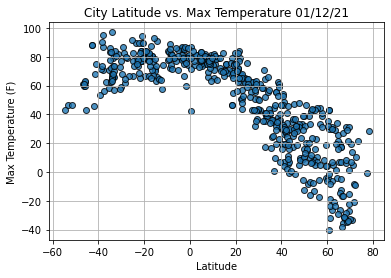

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

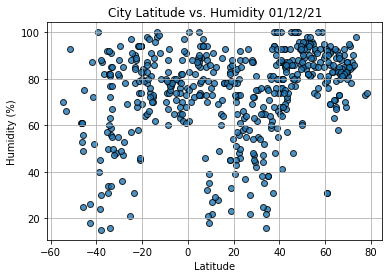

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()